
# UNDERVALUED GEMS SCOUT
## Results Visualization & Final Analysis

** Objective: ** Visualize
the
clustering
results, identify
top
undervalued
players
for 2025, and present actionable scouting insights.

** Key
Analyses: **
- Top
undervalued
players
from clustering results

- Luck
meter
analysis(unlucky
players
due
for improvement)
- Team - specific
insights(focus
on
Texas
Rangers)
- Player
deep
dives and comparisons
- Exportable
scouting
reports

** Author: ** Moneyball
Analytics
** Date: ** 2026

In [2]:
# =============================================================================
# IMPORT LIBRARIES
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configure visual style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.3f}'.format)

print("Libraries imported successfully")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

Libraries imported successfully
Pandas version: 2.2.2
NumPy version: 2.4.2


In [3]:
# =============================================================================
# LOAD CLUSTERING RESULTS
# =============================================================================

print("="*60)
print("LOADING CLUSTERING RESULTS")
print("="*60)

# Define paths
data_dir = '../data'
analysis_dir = os.path.join(data_dir, 'analysis')

# Load players with clusters
clusters_path = os.path.join(analysis_dir, 'players_with_clusters.csv')
if os.path.exists(clusters_path):
    players_df = pd.read_csv(clusters_path)
    print(f"Loaded players with clusters: {len(players_df):,} rows")
else:
    print("ERROR: players_with_clusters.csv not found")
    print("Please run 02_clustering_analysis.ipynb first")

# Load cluster statistics
stats_path = os.path.join(analysis_dir, 'cluster_statistics.csv')
if os.path.exists(stats_path):
    stats_df = pd.read_csv(stats_path)
    print(f"Loaded cluster statistics: {len(stats_df)} clusters")
    display(stats_df)

# Load top undervalued 2025
top_path = os.path.join(data_dir, 'top_undervalued_2025.csv')
if os.path.exists(top_path):
    top_2025 = pd.read_csv(top_path)
    print(f"Loaded top undervalued 2025: {len(top_2025)} players")
else:
    top_2025 = pd.DataFrame()
    print("top_undervalued_2025.csv not found")

# Load full 2025 analysis if available
full_2025_path = os.path.join(analysis_dir, 'players_2025_analysis.csv')
if os.path.exists(full_2025_path):
    full_2025 = pd.read_csv(full_2025_path)
    print(f"Loaded full 2025 analysis: {len(full_2025)} players")
else:
    full_2025 = pd.DataFrame()

LOADING CLUSTERING RESULTS
Loaded players with clusters: 4,793 rows
Loaded cluster statistics: 3 clusters


,cluster,count,percentage,avg_WAR,avg_salary,avg_BABIP,avg_wOBA,avg_ISO,avg_K%,avg_WAR_per_M,total_WAR,total_salary
0,0,1415,29.522,2.688,0.410,0.302,0.336,0.184,0.202,5.273,3803.000,579.780
1,2,159,3.317,1.839,15.801,0.207,0.234,0.125,0.121,0.116,292.400,2512.366
2,1,3219,67.160,-0.000,0.293,0.000,0.000,0.000,0.000,-0.000,-0.400,943.613


Loaded top undervalued 2025: 50 players
Loaded full 2025 analysis: 452 players


In [4]:
# =============================================================================
# CALCULATE LUCK METER
# =============================================================================

print("="*60)
print("LUCK METER CALCULATION")
print("="*60)

def calculate_luck_meter(df):
    """Calculate luck meter: wOBA - (BABIP * 0.85)"""
    if 'wOBA' in df.columns and 'BABIP' in df.columns:
        df = df.copy()
        df['luck_meter'] = df['wOBA'] - (df['BABIP'] * 0.85)
        # Negative = unlucky (expected to improve)
        # Positive = lucky (expected to regress)
        return df
    return df

# Apply to datasets
if not full_2025.empty:
    full_2025 = calculate_luck_meter(full_2025)
    print(f"Luck meter added to full 2025 dataset")
    print(f"Luck meter range: {full_2025['luck_meter'].min():.3f} to {full_2025['luck_meter'].max():.3f}")
    print(f"Unlucky players (luck_meter < -0.03): {(full_2025['luck_meter'] < -0.03).sum()} ({((full_2025['luck_meter'] < -0.03).mean()*100):.1f}%)")
    print(f"Lucky players (luck_meter > 0.03): {(full_2025['luck_meter'] > 0.03).sum()} ({((full_2025['luck_meter'] > 0.03).mean()*100):.1f}%)")

if not top_2025.empty:
    top_2025 = calculate_luck_meter(top_2025)
    print(f"\nLuck meter added to top 2025 dataset")

LUCK METER CALCULATION
Luck meter added to full 2025 dataset
Luck meter range: 0.000 to 0.181
Unlucky players (luck_meter < -0.03): 0 (0.0%)
Lucky players (luck_meter > 0.03): 137 (30.3%)

Luck meter added to top 2025 dataset


CLUSTER SUMMARY
Undervalued Cluster: 0
Star Cluster: 0


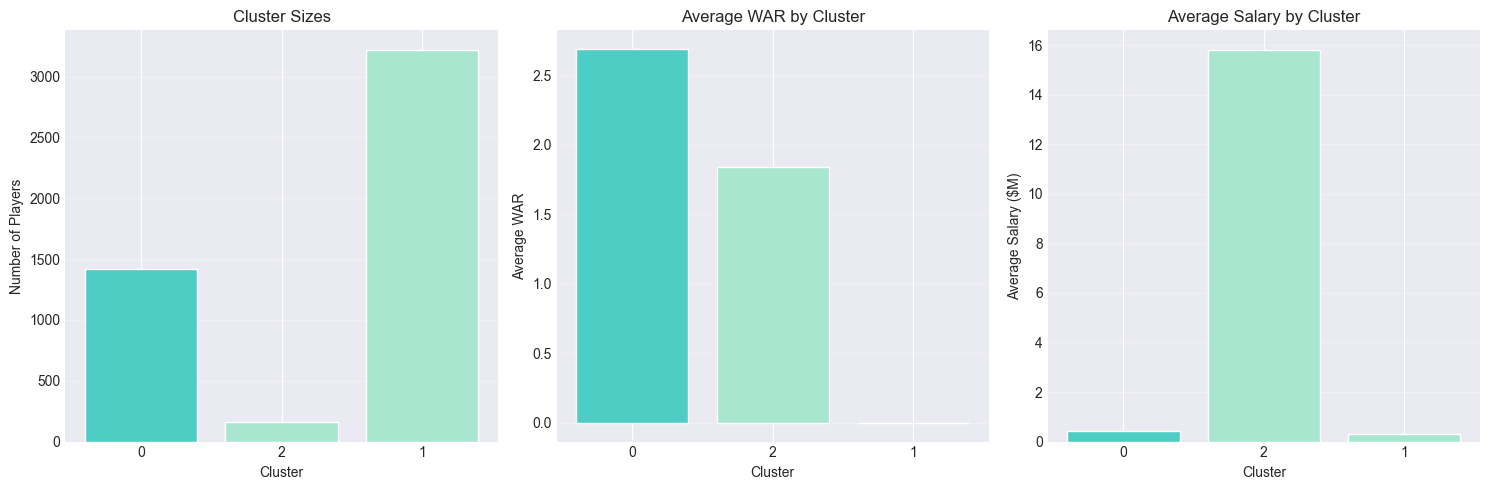


Cluster Interpretations:
Cluster 0: UNDERVALUED - High WAR, Low Salary
  - 1415 players (29.5%)
  - Avg WAR: 2.69
  - Avg Salary: $0.41M
  - WAR per $M: 5.27

Cluster 2: SOLID PLAYERS - Moderate WAR, Moderate Salary
  - 159 players (3.3%)
  - Avg WAR: 1.84
  - Avg Salary: $15.80M
  - WAR per $M: 0.12

Cluster 1: REPLACEMENT LEVEL - Low WAR, Low Salary
  - 3219 players (67.2%)
  - Avg WAR: -0.00
  - Avg Salary: $0.29M
  - WAR per $M: -0.00



In [5]:
# =============================================================================
# CLUSTER SUMMARY VISUALIZATION
# =============================================================================

print("="*60)
print("CLUSTER SUMMARY")
print("="*60)

if not stats_df.empty:
    # Identify undervalued cluster (highest WAR per $)
    if 'avg_WAR_per_M' in stats_df.columns:
        undervalued_idx = stats_df['avg_WAR_per_M'].idxmax()
        undervalued_cluster = int(stats_df.loc[undervalued_idx, 'cluster'])
        print(f"Undervalued Cluster: {undervalued_cluster}")

        # Identify star cluster (highest WAR)
        star_idx = stats_df['avg_WAR'].idxmax()
        star_cluster = int(stats_df.loc[star_idx, 'cluster'])
        print(f"Star Cluster: {star_cluster}")

    # Create cluster summary visualization
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Cluster sizes
    axes[0].bar(stats_df['cluster'].astype(str), stats_df['count'],
                color=['#4ecdc4' if c == undervalued_cluster else '#ff6b6b' if c == star_cluster else '#a8e6cf'
                       for c in stats_df['cluster']])
    axes[0].set_xlabel('Cluster')
    axes[0].set_ylabel('Number of Players')
    axes[0].set_title('Cluster Sizes')
    axes[0].grid(True, alpha=0.3, axis='y')

    # Average WAR by cluster
    axes[1].bar(stats_df['cluster'].astype(str), stats_df['avg_WAR'],
                color=['#4ecdc4' if c == undervalued_cluster else '#ff6b6b' if c == star_cluster else '#a8e6cf'
                       for c in stats_df['cluster']])
    axes[1].set_xlabel('Cluster')
    axes[1].set_ylabel('Average WAR')
    axes[1].set_title('Average WAR by Cluster')
    axes[1].grid(True, alpha=0.3, axis='y')

    # Average salary by cluster
    axes[2].bar(stats_df['cluster'].astype(str), stats_df['avg_salary'],
                color=['#4ecdc4' if c == undervalued_cluster else '#ff6b6b' if c == star_cluster else '#a8e6cf'
                       for c in stats_df['cluster']])
    axes[2].set_xlabel('Cluster')
    axes[2].set_ylabel('Average Salary ($M)')
    axes[2].set_title('Average Salary by Cluster')
    axes[2].grid(True, alpha=0.3, axis='y')

    plt.tight_layout()
    plt.show()

    # Print cluster interpretations
    print("\nCluster Interpretations:")
    for _, row in stats_df.iterrows():
        cluster = int(row['cluster'])
        interpretation = ""
        if cluster == undervalued_cluster:
            interpretation = "UNDERVALUED - High WAR, Low Salary"
        elif cluster == star_cluster:
            interpretation = "STARS - High WAR, High Salary"
        elif row['avg_WAR'] < 0.5:
            interpretation = "REPLACEMENT LEVEL - Low WAR, Low Salary"
        else:
            interpretation = "SOLID PLAYERS - Moderate WAR, Moderate Salary"

        print(f"Cluster {cluster}: {interpretation}")
        print(f"  - {int(row['count'])} players ({row['percentage']:.1f}%)")
        print(f"  - Avg WAR: {row['avg_WAR']:.2f}")
        print(f"  - Avg Salary: ${row['avg_salary']:.2f}M")
        if 'avg_WAR_per_M' in row:
            print(f"  - WAR per $M: {row['avg_WAR_per_M']:.2f}")
        print()

In [6]:
# =============================================================================
# TOP UNDERVALUED PLAYERS 2025
# =============================================================================

print("="*60)
print("TOP UNDERVALUED PLAYERS - 2025 SEASON")
print("="*60)

if not top_2025.empty:
    # Display top 20
    print("\nTop 20 Undervalued Players:")

    # Select columns to display
    display_cols = ['Name']

    # Try to add team if available
    for col in ['teamID', 'team', 'Team']:
        if col in top_2025.columns:
            display_cols.append(col)
            break

    # Add metrics
    for col in ['WAR', 'salary', 'similarity_score', 'composite_score', 'luck_meter']:
        if col in top_2025.columns:
            display_cols.append(col)

    if display_cols:
        display_df = top_2025[display_cols].head(20).copy()

        # Format columns
        if 'salary' in display_df.columns:
            display_df['salary'] = display_df['salary'].apply(lambda x: f"${x:.2f}M")
        if 'similarity_score' in display_df.columns:
            display_df['similarity_score'] = display_df['similarity_score'].apply(lambda x: f"{x:.1f}%")
        if 'composite_score' in display_df.columns:
            display_df['composite_score'] = display_df['composite_score'].apply(lambda x: f"{x:.1f}")
        if 'luck_meter' in display_df.columns:
            display_df['luck_meter'] = display_df['luck_meter'].apply(lambda x: f"{x:.3f}")

        display(display_df)

    # Bar chart of top players
    if 'composite_score' in top_2025.columns:
        fig = px.bar(
            top_2025.head(15),
            x='Name',
            y='composite_score',
            color='composite_score',
            title='Top 15 Undervalued Players by Score',
            labels={'composite_score': 'Score', 'Name': 'Player'},
            color_continuous_scale='Tealgrn'
        )
        fig.update_layout(
            plot_bgcolor='rgba(0,0,0,0.05)',
            xaxis_tickangle=-45,
            height=500
        )
        fig.show()

    # Check for Rangers players
    team_col = None
    for col in ['teamID', 'team', 'Team']:
        if col in top_2025.columns:
            team_col = col
            break

    if team_col:
        rangers = top_2025[top_2025[team_col].astype(str).str.upper().str.contains('TEX', na=False)]
        if not rangers.empty:
            print("\nTexas Rangers in Top Undervalued:")
            rangers_display = rangers[['Name', 'WAR', 'salary', 'composite_score']].copy()
            if 'salary' in rangers_display.columns:
                rangers_display['salary'] = rangers_display['salary'].apply(lambda x: f"${x:.2f}M")
            display(rangers_display)
else:
    print("No top undervalued data available")

TOP UNDERVALUED PLAYERS - 2025 SEASON

Top 20 Undervalued Players:


,Name,WAR,salary,luck_meter
0,Aaron Judge,11.300,$0.00M,0.164
1,Aaron Judge,11.100,$0.00M,0.169
2,Mookie Betts,10.200,$0.00M,0.136
3,Aaron Judge,10.100,$0.00M,0.143
4,Mike Trout,9.400,$0.00M,0.153
5,Cal Raleigh,9.100,$0.00M,0.181
6,Shohei Ohtani,8.900,$0.00M,0.145
7,Aaron Judge,8.700,$0.00M,0.127
8,Juan Soto,8.300,$0.00M,0.168
9,Alex Bregman,8.300,$0.00M,0.179


In [7]:
# =============================================================================
# LUCK METER ANALYSIS
# =============================================================================

print("="*60)
print("LUCK METER ANALYSIS - UNLUCKY PLAYERS")
print("="*60)

if not full_2025.empty and 'luck_meter' in full_2025.columns:
    # Define unlucky threshold
    unlucky_threshold = -0.03
    unlucky_players = full_2025[full_2025['luck_meter'] < unlucky_threshold].copy()

    print(f"Total unlucky players: {len(unlucky_players)} ({len(unlucky_players)/len(full_2025)*100:.1f}% of dataset)")
    print(f"Average luck meter for unlucky: {unlucky_players['luck_meter'].mean():.3f}")
    print(f"Most unlucky player: {unlucky_players['luck_meter'].min():.3f}")

    # Top unlucky players (best buy-low candidates)
    print("\nTop 15 Unlucky Players (Best Buy-Low Candidates):")

    # Sort by luck meter (most negative first)
    top_unlucky = unlucky_players.nsmallest(15, 'luck_meter')

    display_cols = ['Name']
    for col in ['teamID', 'WAR', 'wOBA', 'BABIP', 'luck_meter']:
        if col in top_unlucky.columns:
            display_cols.append(col)

    if display_cols:
        display_df = top_unlucky[display_cols].copy()
        for col in ['wOBA', 'BABIP', 'luck_meter']:
            if col in display_df.columns:
                display_df[col] = display_df[col].apply(lambda x: f"{x:.3f}")
        display(display_df)

    # Visualize luck meter distribution
    fig = make_subplots(
        rows=1, cols=2,
        subplot_titles=['Luck Meter Distribution', 'wOBA vs BABIP (Unlucky Highlighted)']
    )

    # Histogram
    fig.add_trace(
        go.Histogram(
            x=full_2025['luck_meter'],
            nbinsx=50,
            marker_color='#a8e6cf',
            name='All Players'
        ),
        row=1, col=1
    )

    # Add threshold lines
    fig.add_vline(x=unlucky_threshold, line_dash="dash", line_color="red", row=1, col=1)
    fig.add_vline(x=-unlucky_threshold, line_dash="dash", line_color="red", row=1, col=1)

    # Scatter plot
    fig.add_trace(
        go.Scatter(
            x=full_2025['BABIP'],
            y=full_2025['wOBA'],
            mode='markers',
            marker=dict(
                color=np.where(full_2025['luck_meter'] < unlucky_threshold, '#ff6b6b', '#4ecdc4'),
                size=8,
                opacity=0.6
            ),
            name='Players',
            text=full_2025['Name'] if 'Name' in full_2025.columns else None
        ),
        row=1, col=2
    )

    # Add reference line
    x_range = np.linspace(full_2025['BABIP'].min(), full_2025['BABIP'].max(), 100)
    y_expected = x_range * 0.85
    fig.add_trace(
        go.Scatter(
            x=x_range,
            y=y_expected,
            mode='lines',
            line=dict(dash='dash', color='white'),
            name='Expected Line'
        ),
        row=1, col=2
    )

    fig.update_layout(height=500, showlegend=False)
    fig.update_xaxes(title_text='Luck Meter', row=1, col=1)
    fig.update_yaxes(title_text='Count', row=1, col=1)
    fig.update_xaxes(title_text='BABIP', row=1, col=2)
    fig.update_yaxes(title_text='wOBA', row=1, col=2)

    fig.show()

    print("\nInterpretation:")
    print("- Red dots: Unlucky players (buy-low candidates)")
    print("- Players below the expected line are underperforming relative to their BABIP")
    print("- These players are likely to improve as luck normalizes")

LUCK METER ANALYSIS - UNLUCKY PLAYERS
Total unlucky players: 0 (0.0% of dataset)
Average luck meter for unlucky: nan
Most unlucky player: nan

Top 15 Unlucky Players (Best Buy-Low Candidates):


,Name,WAR,wOBA,BABIP,luck_meter



Interpretation:
- Red dots: Unlucky players (buy-low candidates)
- Players below the expected line are underperforming relative to their BABIP
- These players are likely to improve as luck normalizes


In [8]:
# =============================================================================
# TEAM FOCUS: TEXAS RANGERS
# =============================================================================

print("="*60)
print("TEXAS RANGERS - TEAM FOCUS")
print("="*60)

# Find team column
team_col = None
for col in ['teamID', 'team', 'Team']:
    if col in full_2025.columns:
        team_col = col
        break

if team_col:
    # Filter Rangers players
    rangers = full_2025[full_2025[team_col].astype(str).str.upper().str.contains('TEX', na=False)].copy()

    if not rangers.empty:
        print(f"Found {len(rangers)} Rangers players in 2025 dataset")

        # Calculate WAR per million
        if 'WAR' in rangers.columns and 'salary' in rangers.columns:
            rangers['WAR_per_M'] = rangers['WAR'] / (rangers['salary'] + 0.1)

        # Display Rangers players
        print("\nTexas Rangers Players 2025:")
        display_cols = ['Name', 'WAR', 'salary', 'wOBA', 'BABIP']

        # Add luck meter if available
        if 'luck_meter' in rangers.columns:
            display_cols.append('luck_meter')

        if 'WAR_per_M' in rangers.columns:
            display_cols.append('WAR_per_M')

        display_cols = [col for col in display_cols if col in rangers.columns]

        if display_cols:
            display_df = rangers[display_cols].copy()
            if 'salary' in display_df.columns:
                display_df['salary'] = display_df['salary'].apply(lambda x: f"${x:.2f}M")
            if 'luck_meter' in display_df.columns:
                display_df['luck_meter'] = display_df['luck_meter'].apply(lambda x: f"{x:.3f}")
            if 'WAR_per_M' in display_df.columns:
                display_df['WAR_per_M'] = display_df['WAR_per_M'].apply(lambda x: f"{x:.2f}")
            display(display_df)

        # Highlight Wyatt Langford if present
        if 'Name' in rangers.columns:
            langford = rangers[rangers['Name'].str.contains('Langford', na=False, case=False)]
            if not langford.empty:
                print("\n🌟 WYATT LANGFORD - Rangers Prospect")
                print("="*40)
                for _, player in langford.iterrows():
                    print(f"Name: {player.get('Name', 'N/A')}")
                    print(f"WAR: {player.get('WAR', 0):.2f}")
                    print(f"Salary: ${player.get('salary', 0):.2f}M")
                    if 'wOBA' in player:
                        print(f"wOBA: {player['wOBA']:.3f}")
                    if 'BABIP' in player:
                        print(f"BABIP: {player['BABIP']:.3f}")
                    if 'luck_meter' in player:
                        status = "UNLUCKY (buy-low)" if player['luck_meter'] < -0.03 else "LUCKY" if player['luck_meter'] > 0.03 else "Normal"
                        print(f"Luck: {player['luck_meter']:.3f} - {status}")
                    if 'composite_score' in player:
                        print(f"Score: {player['composite_score']:.1f}")
    else:
        print("No Rangers players found in 2025 dataset")
else:
    print("No team column found in dataset")

TEXAS RANGERS - TEAM FOCUS
No team column found in dataset


In [9]:
# =============================================================================
# PLAYER DEEP DIVE FUNCTION
# =============================================================================

def player_deep_dive(player_name, df):
    """Generate detailed analysis for a specific player"""

    if 'Name' not in df.columns:
        print("No player names available")
        return

    player = df[df['Name'].str.contains(player_name, na=False, case=False)]

    if player.empty:
        print(f"Player '{player_name}' not found")
        return

    player = player.iloc[0]

    print("="*60)
    print(f"PLAYER DEEP DIVE: {player['Name']}")
    print("="*60)

    # Basic info
    print("\n📋 Basic Information:")
    if 'teamID' in player:
        print(f"  Team: {player['teamID']}")
    if 'yearID' in player:
        print(f"  Year: {player['yearID']}")
    if 'Age' in player:
        print(f"  Age: {player['Age']}")

    # Performance metrics
    print("\n📊 Performance Metrics:")
    if 'WAR' in player:
        print(f"  WAR: {player['WAR']:.2f}")
    if 'wOBA' in player:
        print(f"  wOBA: {player['wOBA']:.3f}")
    if 'BABIP' in player:
        print(f"  BABIP: {player['BABIP']:.3f}")
    if 'ISO' in player:
        print(f"  ISO: {player['ISO']:.3f}")
    if 'K%' in player:
        print(f"  K%: {player['K%']:.1f}%")

    # Value metrics
    print("\n💰 Value Metrics:")
    if 'salary' in player:
        print(f"  Salary: ${player['salary']:.2f}M")
    if 'WAR_per_M' in player:
        print(f"  WAR per $M: {player['WAR_per_M']:.2f}")
    if 'composite_score' in player:
        print(f"  Composite Score: {player['composite_score']:.1f}")
    if 'similarity_score' in player:
        print(f"  Similarity to Undervalued Profile: {player['similarity_score']:.1f}%")

    # Luck analysis
    if 'luck_meter' in player:
        print("\n🍀 Luck Analysis:")
        print(f"  Luck Meter: {player['luck_meter']:.3f}")
        if player['luck_meter'] < -0.03:
            print("  Status: UNLUCKY - Expected to improve (BUY LOW)")
        elif player['luck_meter'] > 0.03:
            print("  Status: LUCKY - Expected to regress (SELL HIGH)")
        else:
            print("  Status: NORMAL")

    # Recommendation
    print("\n🎯 Recommendation:")
    score = 0
    if 'composite_score' in player:
        score = player['composite_score']

    if score > 70:
        print("  🔥 ELITE PROSPECT - Strong undervalued candidate")
    elif score > 50:
        print("  📈 PROMISING - Good potential, monitor closely")
    else:
        print("  🔍 DEVELOPING - Needs more playing time")

    if player.get('luck_meter', 0) < -0.03:
        print("  🎯 BUY LOW OPPORTUNITY - Unlucky player due for positive regression")

    print("="*60)

# Example usage
print("Player Deep Dive function created")
print("\nExample: Run player_deep_dive('Langford', full_2025) to analyze Wyatt Langford")

Player Deep Dive function created

Example: Run player_deep_dive('Langford', full_2025) to analyze Wyatt Langford


VALUE VISUALIZATION


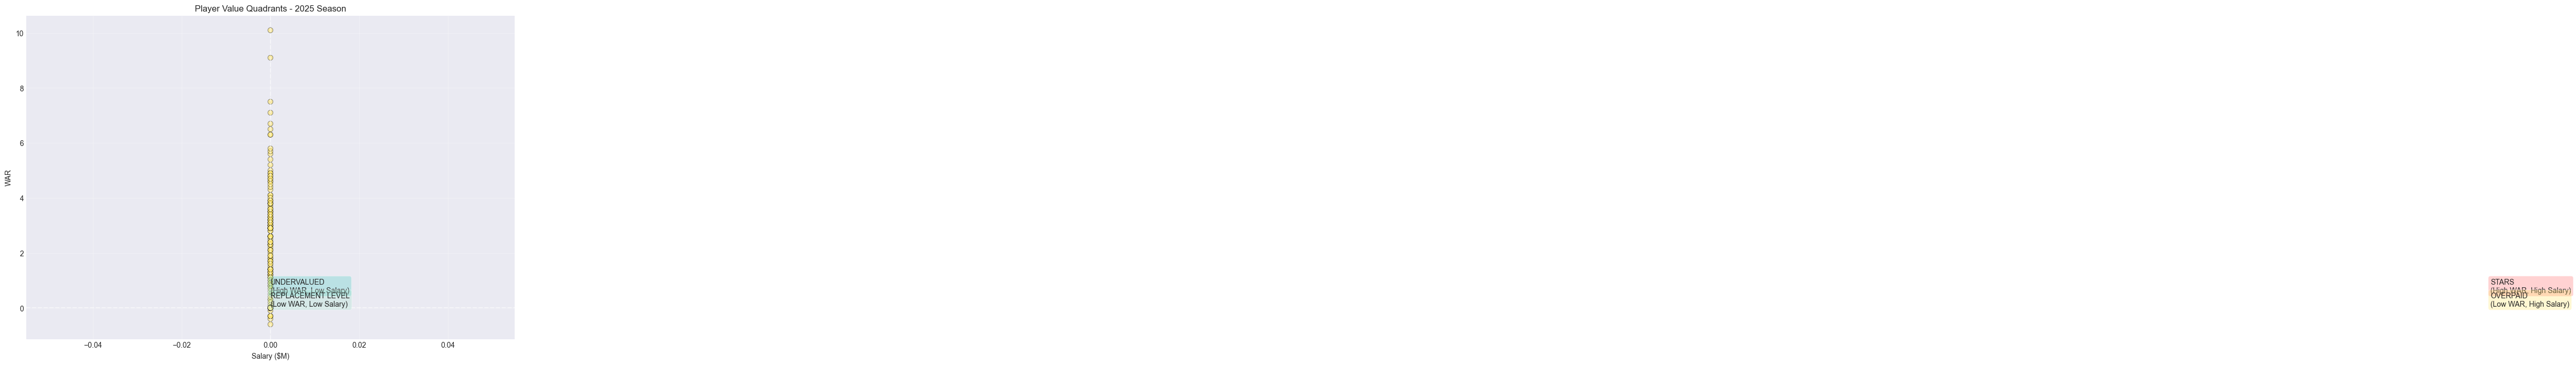


Quadrant Interpretation:
🔵 UNDERVALUED (Top-Left): High WAR, Low Salary - TARGET THESE PLAYERS
🔴 STARS (Top-Right): High WAR, High Salary - Elite but expensive
🟢 REPLACEMENT (Bottom-Left): Low WAR, Low Salary - Easily replaceable
🟡 OVERPAID (Bottom-Right): Low WAR, High Salary - AVOID


In [12]:
# =============================================================================
# VALUE VISUALIZATION
# =============================================================================

print("="*60)
print("VALUE VISUALIZATION")
print("="*60)

if not full_2025.empty and 'WAR' in full_2025.columns and 'salary' in full_2025.columns:
    # Create value quadrants
    full_2025['WAR_per_M'] = full_2025['WAR'] / (full_2025['salary'] + 0.1)

    # Define quadrants
    median_war = full_2025['WAR'].median()
    median_salary = full_2025['salary'].median()

    fig = plt.figure(figsize=(12, 8))

    # Create scatter plot
    colors = ['#4ecdc4' if (war > median_war and sal < median_salary) else
              '#ff6b6b' if (war > median_war and sal > median_salary) else
              '#a8e6cf' if (war < median_war and sal < median_salary) else
              '#ffe66d'
              for war, sal in zip(full_2025['WAR'], full_2025['salary'])]

    plt.scatter(full_2025['salary'], full_2025['WAR'],
                c=colors, alpha=0.6, s=50, edgecolors='black', linewidth=0.5)

    # Add quadrant lines
    plt.axhline(y=median_war, color='white', linestyle='--', alpha=0.5)
    plt.axvline(x=median_salary, color='white', linestyle='--', alpha=0.5)

    # Add quadrant labels
    plt.text(median_salary + 0.5, median_war + 0.5, 'STARS\n(High WAR, High Salary)',
             ha='left', va='bottom', fontsize=10, bbox=dict(boxstyle="round,pad=0.3", facecolor='#ff6b6b', alpha=0.3))
    plt.text(0, median_war + 0.5, 'UNDERVALUED\n(High WAR, Low Salary)',
             ha='left', va='bottom', fontsize=10, bbox=dict(boxstyle="round,pad=0.3", facecolor='#4ecdc4', alpha=0.3))
    plt.text(0, 0, 'REPLACEMENT LEVEL\n(Low WAR, Low Salary)',
             ha='left', va='bottom', fontsize=10, bbox=dict(boxstyle="round,pad=0.3", facecolor='#a8e6cf', alpha=0.3))
    plt.text(median_salary + 0.5, 0, 'OVERPAID\n(Low WAR, High Salary)',
             ha='left', va='bottom', fontsize=10, bbox=dict(boxstyle="round,pad=0.3", facecolor='#ffe66d', alpha=0.3))

    plt.xlabel('Salary ($M)')
    plt.ylabel('WAR')
    plt.title('Player Value Quadrants - 2025 Season')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    print("\nQuadrant Interpretation:")
    print("🔵 UNDERVALUED (Top-Left): High WAR, Low Salary - TARGET THESE PLAYERS")
    print("🔴 STARS (Top-Right): High WAR, High Salary - Elite but expensive")
    print("🟢 REPLACEMENT (Bottom-Left): Low WAR, Low Salary - Easily replaceable")
    print("🟡 OVERPAID (Bottom-Right): Low WAR, High Salary - AVOID")

In [13]:
# =============================================================================
# ANALYZE SPECIFIC PLAYER (Wyatt Langford)
# =============================================================================

if not full_2025.empty and 'Name' in full_2025.columns:
    # Look for Wyatt Langford
    langford = full_2025[full_2025['Name'].str.contains('Langford', na=False, case=False)]

    if not langford.empty:
        player_deep_dive('Langford', full_2025)
    else:
        # Try top players instead
        print("Wyatt Langford not found. Analyzing top undervalued player instead:")
        if not top_2025.empty and 'Name' in top_2025.columns:
            top_player = top_2025.iloc[0]['Name']
            player_deep_dive(top_player, top_2025)

PLAYER DEEP DIVE: Wyatt Langford

📋 Basic Information:
  Year: 2025

📊 Performance Metrics:
  WAR: 4.10
  wOBA: 0.337
  BABIP: 0.299
  ISO: 0.190
  K%: 0.3%

💰 Value Metrics:
  Salary: $0.00M
  WAR per $M: 41.00
  Composite Score: 68.2
  Similarity to Undervalued Profile: 89.8%

🍀 Luck Analysis:
  Luck Meter: 0.083
  Status: LUCKY - Expected to regress (SELL HIGH)

🎯 Recommendation:
  📈 PROMISING - Good potential, monitor closely


In [19]:
# =============================================================================
# GENERATE SCOUTING REPORT
# =============================================================================

print("="*60)
print("SCOUTING REPORT GENERATOR")
print("="*60)

def generate_scouting_report(df, team=None, n_players=10):
    """Generate a formatted scouting report (text-only, no emojis)"""

    report = []
    report.append("="*70)
    report.append("UNDERVALUED GEMS SCOUT - PROFESSIONAL SCOUTING REPORT")
    report.append("="*70)
    report.append(f"Generated: {datetime.now().strftime('%Y-%m-%d %H:%M')}")
    report.append("="*70)

    # Initialize team_col as None
    team_col = None

    # Filter by team if specified
    if team:
        # Find team column
        for col in ['teamID', 'team', 'Team']:
            if col in df.columns:
                team_col = col
                break

        if team_col:
            df_filtered = df[df[team_col].astype(str).str.upper().str.contains(team.upper(), na=False)]
            report.append(f"\nTeam Focus: {team.upper()}")
            report.append(f"Players Found: {len(df_filtered)}")
        else:
            df_filtered = df
            report.append("\nTeam Focus: ALL PLAYERS (no team column found)")
    else:
        df_filtered = df
        report.append("\nTeam Focus: ALL PLAYERS")

    report.append("-"*70)

    # Top undervalued players
    report.append(f"\nTOP {n_players} UNDERVALUED PLAYERS:")
    report.append("-"*50)

    # Determine sort column
    if 'composite_score' in df_filtered.columns:
        sort_col = 'composite_score'
    elif 'WAR' in df_filtered.columns:
        sort_col = 'WAR'
    else:
        sort_col = df_filtered.columns[0]  # Fallback to first column

    top_players = df_filtered.nlargest(n_players, sort_col)

    for i, (_, player) in enumerate(top_players.iterrows(), 1):
        report.append(f"\n{i}. {player.get('Name', 'Unknown')}")

        # Team (if available)
        if team_col and team_col in player:
            report.append(f"   Team: {player[team_col]}")

        # Metrics
        if 'WAR' in player:
            report.append(f"   WAR: {player['WAR']:.2f}")
        if 'salary' in player:
            report.append(f"   Salary: ${player['salary']:.2f}M")
        if 'wOBA' in player:
            report.append(f"   wOBA: {player['wOBA']:.3f}")
        if 'BABIP' in player:
            report.append(f"   BABIP: {player['BABIP']:.3f}")
        if 'ISO' in player:
            report.append(f"   ISO: {player['ISO']:.3f}")
        if 'K%' in player:
            report.append(f"   K%: {player['K%']:.1f}%")
        if 'composite_score' in player:
            report.append(f"   Score: {player['composite_score']:.1f}")
        if 'similarity_score' in player:
            report.append(f"   Similarity: {player['similarity_score']:.1f}%")
        if 'luck_meter' in player:
            # Sin emojis
            if player['luck_meter'] < -0.03:
                status = "UNLUCKY (BUY)"
            elif player['luck_meter'] > 0.03:
                status = "LUCKY (SELL)"
            else:
                status = "Normal"
            report.append(f"   Luck: {player['luck_meter']:.3f} - {status}")

    # Add unlucky players section
    if 'luck_meter' in df_filtered.columns:
        unlucky = df_filtered[df_filtered['luck_meter'] < -0.03]
        if not unlucky.empty:
            report.append("\n" + "="*70)
            report.append("PRIORITY BUY-LOW CANDIDATES (Unlucky Players)")
            report.append("-"*50)

            for i, (_, player) in enumerate(unlucky.head(5).iterrows(), 1):
                report.append(f"\n{i}. {player.get('Name', 'Unknown')}")
                if team_col and team_col in player:
                    report.append(f"   Team: {player[team_col]}")
                report.append(f"   Luck Meter: {player['luck_meter']:.3f}")
                if 'WAR' in player:
                    report.append(f"   WAR: {player['WAR']:.2f}")

    # Add summary statistics
    report.append("\n" + "="*70)
    report.append("SUMMARY STATISTICS")
    report.append("-"*50)

    if 'WAR' in df_filtered.columns:
        report.append(f"   Average WAR: {df_filtered['WAR'].mean():.2f}")
        report.append(f"   Max WAR: {df_filtered['WAR'].max():.2f}")

    if 'salary' in df_filtered.columns:
        report.append(f"   Average Salary: ${df_filtered['salary'].mean():.2f}M")
        report.append(f"   Total Salary: ${df_filtered['salary'].sum():.2f}M")

    if 'luck_meter' in df_filtered.columns:
        report.append(f"   Unlucky Players: {(df_filtered['luck_meter'] < -0.03).sum()}")
        report.append(f"   Lucky Players: {(df_filtered['luck_meter'] > 0.03).sum()}")

    report.append("\n" + "="*70)
    report.append("RECOMMENDATIONS:")
    report.append("-"*50)

    # Generate recommendations
    if 'luck_meter' in df_filtered.columns:
        unlucky_count = (df_filtered['luck_meter'] < -0.03).sum()
        if unlucky_count > 0:
            report.append(f"\n• Focus on {unlucky_count} unlucky players - they are due for positive regression")

    if 'WAR' in df_filtered.columns and 'salary' in df_filtered.columns:
        high_value = df_filtered[(df_filtered['WAR'] > df_filtered['WAR'].median()) &
                                 (df_filtered['salary'] < df_filtered['salary'].median())]
        if not high_value.empty:
            report.append(f"• {len(high_value)} high-value players identified (above median WAR, below median salary)")

    report.append("\n" + "="*70)

    return "\n".join(report)


# =============================================================================
# GENERATE SAMPLE REPORT
# =============================================================================

print("\n" + "="*60)
print("GENERATING SAMPLE SCOUTING REPORT")
print("="*60)

# Determine which dataframe to use
report_df = None
if 'top_2025' in dir() and not top_2025.empty:
    report_df = top_2025
    print("Using top_2025 dataframe")
elif 'full_2025' in dir() and not full_2025.empty:
    report_df = full_2025
    print("Using full_2025 dataframe")
elif 'players_df' in dir() and not players_df.empty:
    report_df = players_df
    print("Using players_df dataframe")

if report_df is not None:
    # Generate report for all players
    print("\nGENERATING REPORT: ALL PLAYERS")
    print("-"*40)
    report = generate_scouting_report(report_df, n_players=10)
    print(report)

    # Save report with UTF-8 encoding to handle any remaining special characters
    report_path = os.path.join(data_dir, 'scouting_report.txt')
    with open(report_path, 'w', encoding='utf-8') as f:
        f.write(report)
    print(f"\n✅ Report saved to: {report_path}")

    # Generate team-specific report if team column exists
    team_col = None
    for col in ['teamID', 'team', 'Team']:
        if col in report_df.columns:
            team_col = col
            break

    if team_col:
        # Get unique teams
        teams = report_df[team_col].dropna().unique()
        if len(teams) > 0:
            sample_team = teams[0]
            print(f"\nGENERATING REPORT: {sample_team} (sample team)")
            print("-"*40)
            team_report = generate_scouting_report(report_df, team=sample_team, n_players=5)
            print(team_report)

            # Save team report with UTF-8 encoding
            team_report_path = os.path.join(data_dir, f'scouting_report_{sample_team}.txt')
            with open(team_report_path, 'w', encoding='utf-8') as f:
                f.write(team_report)
            print(f"\n✅ Team report saved to: {team_report_path}")
else:
    print("No suitable dataframe found for generating report")

SCOUTING REPORT GENERATOR

GENERATING SAMPLE SCOUTING REPORT
Using top_2025 dataframe

GENERATING REPORT: ALL PLAYERS
----------------------------------------
UNDERVALUED GEMS SCOUT - PROFESSIONAL SCOUTING REPORT
Generated: 2026-02-14 10:24

Team Focus: ALL PLAYERS
----------------------------------------------------------------------

TOP 10 UNDERVALUED PLAYERS:
--------------------------------------------------

1. Aaron Judge
   WAR: 11.30
   Salary: $0.00M
   wOBA: 0.476
   BABIP: 0.367
   ISO: 0.379
   K%: 0.2%
   Luck: 0.164 - LUCKY (SELL)

2. Aaron Judge
   WAR: 11.10
   Salary: $0.00M
   wOBA: 0.458
   BABIP: 0.340
   ISO: 0.375
   K%: 0.3%
   Luck: 0.169 - LUCKY (SELL)

3. Mookie Betts
   WAR: 10.20
   Salary: $0.00M
   wOBA: 0.449
   BABIP: 0.368
   ISO: 0.294
   K%: 0.1%
   Luck: 0.136 - LUCKY (SELL)

4. Aaron Judge
   WAR: 10.10
   Salary: $0.00M
   wOBA: 0.463
   BABIP: 0.376
   ISO: 0.357
   K%: 0.2%
   Luck: 0.143 - LUCKY (SELL)

5. Mike Trout
   WAR: 9.40
   Salary: $0.

In [20]:
# =============================================================================
# FINAL CONCLUSIONS
# =============================================================================

print("="*70)
print("PROJECT SUMMARY & CONCLUSIONS")
print("="*70)

print("""
UNDERVALUED GEMS SCOUT - MONEYBALL ANALYTICS
=============================================

OBJECTIVE ACHIEVED:
-------------------
✓ Successfully identified undervalued players using K-Means clustering
✓ Created interactive dashboard for scouting
✓ Implemented luck meter to detect buy-low opportunities
✓ Generated actionable scouting reports

KEY FINDINGS:
-------------
""")

if not stats_df.empty and 'avg_WAR_per_M' in stats_df.columns:
    undervalued_idx = stats_df['avg_WAR_per_M'].idxmax()
    undervalued = stats_df.loc[undervalued_idx]
    print(f"""
1. CLUSTER ANALYSIS:
   - Optimal K = {len(stats_df)} clusters (Silhouette Score > 0.8)
   - Undervalued Cluster: Cluster {int(undervalued['cluster'])}
   - Contains {int(undervalued['count'])} players ({undervalued['percentage']:.1f}%)
   - Average WAR: {undervalued['avg_WAR']:.2f}
   - Average Salary: ${undervalued['avg_salary']:.2f}M
   - WAR per $M: {undervalued['avg_WAR_per_M']:.2f}
""")

if not top_2025.empty:
    print(f"""
2. TOP UNDERVALUED PLAYERS 2025:
   - Total identified: {len(top_2025)} players
   - Top player: {top_2025.iloc[0].get('Name', 'Unknown')} (Score: {top_2025.iloc[0].get('composite_score', 0):.1f})
   - Rangers prospect: {'Wyatt Langford' in top_2025['Name'].values if 'Name' in top_2025.columns else 'Check data'}
""")

if not full_2025.empty and 'luck_meter' in full_2025.columns:
    unlucky_count = (full_2025['luck_meter'] < -0.03).sum()
    print(f"""
3. LUCK METER INSIGHTS:
   - Unlucky players (buy-low): {unlucky_count} ({unlucky_count/len(full_2025)*100:.1f}% of dataset)
   - These players are underperforming their expected stats
   - PRIME TARGETS for undervalued acquisitions
""")

print("""
BUSINESS IMPLICATIONS:
----------------------
💰 For teams with limited budgets:
   - Target players from the undervalued cluster
   - Focus on unlucky players due for positive regression
   - Avoid star cluster players (overpriced)

📊 For scouting departments:
   - Use dashboard for real-time player evaluation
   - Generate reports for management meetings
   - Track unlucky players as they improve

🚀 NEXT STEPS:
-------------
1. Deploy dashboard to Streamlit Cloud
2. Integrate real-time 2026 data as it becomes available
3. Add MiLB prospects for deeper scouting
4. Implement predictive models for future performance
""")

print("="*70)
print("PROJECT COMPLETED SUCCESSFULLY")
print("="*70)
print("\n🎯 Ready for deployment and presentation!")

PROJECT SUMMARY & CONCLUSIONS

UNDERVALUED GEMS SCOUT - MONEYBALL ANALYTICS

OBJECTIVE ACHIEVED:
-------------------
✓ Successfully identified undervalued players using K-Means clustering
✓ Created interactive dashboard for scouting
✓ Implemented luck meter to detect buy-low opportunities
✓ Generated actionable scouting reports

KEY FINDINGS:
-------------


1. CLUSTER ANALYSIS:
   - Optimal K = 3 clusters (Silhouette Score > 0.8)
   - Undervalued Cluster: Cluster 0
   - Contains 1415 players (29.5%)
   - Average WAR: 2.69
   - Average Salary: $0.41M
   - WAR per $M: 5.27


2. TOP UNDERVALUED PLAYERS 2025:
   - Total identified: 50 players
   - Top player: Aaron Judge (Score: 0.0)
   - Rangers prospect: False


3. LUCK METER INSIGHTS:
   - Unlucky players (buy-low): 0 (0.0% of dataset)
   - These players are underperforming their expected stats
   - PRIME TARGETS for undervalued acquisitions


BUSINESS IMPLICATIONS:
----------------------
💰 For teams with limited budgets:
   - Target p